# __1 Boston 주택 가격 예측 모델__
## __1.1 Data__  
- 보스턴 시의 주택 가격에 대한 데이터셋
- 주택의 여러 요건들과 가격 정보 포함
- 회귀분석에 자주 사용되는 대표적인 데이터셋
<br/>
- 데이터셋의 feature에 대한 설명

| Feature | Description |
|---------|-------------|
| CRIM    | 자치시별 1인당 범죄율 |
| ZN      | 25,000 평방피트를 초과하는 거주지역의 비율 |
| INDUS   | 비소매상업지역이 점유하고 있는 토지의 비율 |
| CHAS    | 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) |
| NOX     | 10ppm 당 농축 일산화질소 |
| RM      | 주택 1 가구당 평균 방의 개수 |
| AGE     | 1940년 이전에 건축된 소유주택의 비율 |
| DIS     | 5개의 보스턴 직업센터까지의 접근성 지수 |
| RAD     | 방사형 도로까지의 접근성 지수 |
| TAX     | 10,000 달러당 재산세율 |
| PTRATIO | 자치시별 학생/교사 비율 |
| B       | \(1000(Bk - 0.63)^2\), 여기서 \(Bk\)는 자치시별 흑인의 비율 |
| LSTAT   | 모집단의 하위계층의 비율(%) |
| MEDV    | 본인 소유의 주택가격(중앙값), 단위: $1,000 |


## __1.2 데이터 로드 및 전처리__  
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print("train 데이터셋의 크기:", len(train_data))
print("test 데이터셋의 크기:", len(test_data))

train 데이터셋의 크기: 404
test 데이터셋의 크기: 102


train에는 404개, test에는 102개의 데이터가 들어있다.

- 값의 범위가 다르면 제대로 학습시키기 어려움
- 데이터셋의 전처리를 위해 표준화 작업을 수행  

__[표준화 (Standardization)]__  $z = \frac{x - \bar{x}}{\sigma} = \frac{X - \text{Mean}(X)}{\text{StdDev}(X)}$



In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균과 표준편차를 구함.
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

# 입력 데이터의 각 특성의 평균을 뺍니다.
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

❗data leakage 방지, 일관성 유지를 위해 test 데이터셋에 대해서도 train 데이터셋의 mean과 std값을 빼준다.

## __1.3 모델 구성 및 컴파일__  
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다.
- Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.  

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# 우선 강의에 나온 내용대로 모델 구성
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
# 회귀모델이므로 활성화 함수는 없다.

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


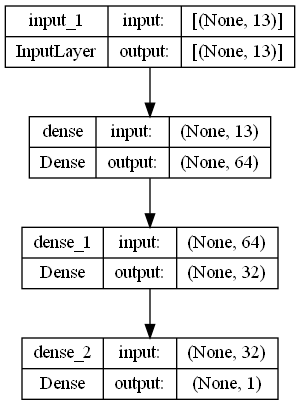

In [5]:
utils.plot_model(model, show_shapes = True)

## __1.4 모델 학습__

In [6]:
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=20,
                    validation_data=(test_data, test_labels))


mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

Epoch 1/60


21/21 [==============================] - 1s 8ms/step - loss: 555.7260 - mae: 21.7770 - val_loss: 532.1202 - val_mae: 21.3116
Epoch 2/60
21/21 [==============================] - 0s 2ms/step - loss: 464.1125 - mae: 19.7321 - val_loss: 433.8141 - val_mae: 19.0384
Epoch 3/60
21/21 [==============================] - 0s 2ms/step - loss: 367.3381 - mae: 17.2932 - val_loss: 327.5399 - val_mae: 16.1845
Epoch 4/60
21/21 [==============================] - 0s 2ms/step - loss: 264.1305 - mae: 14.1978 - val_loss: 223.1149 - val_mae: 12.8358
Epoch 5/60
21/21 [==============================] - 0s 2ms/step - loss: 170.1258 - mae: 10.8023 - val_loss: 139.0645 - val_mae: 9.8818
Epoch 6/60
21/21 [==============================] - 0s 2ms/step - loss: 102.6519 - mae: 7.8946 - val_loss: 84.4756 - val_mae: 7.4282
Epoch 7/60
21/21 [==============================] - 0s 2ms/step - loss: 63.5197 - mae: 6.1214 - val_loss: 59.5688 - val_mae: 6.1597
Epoch 8/60
21/21 [==============================] - 0s

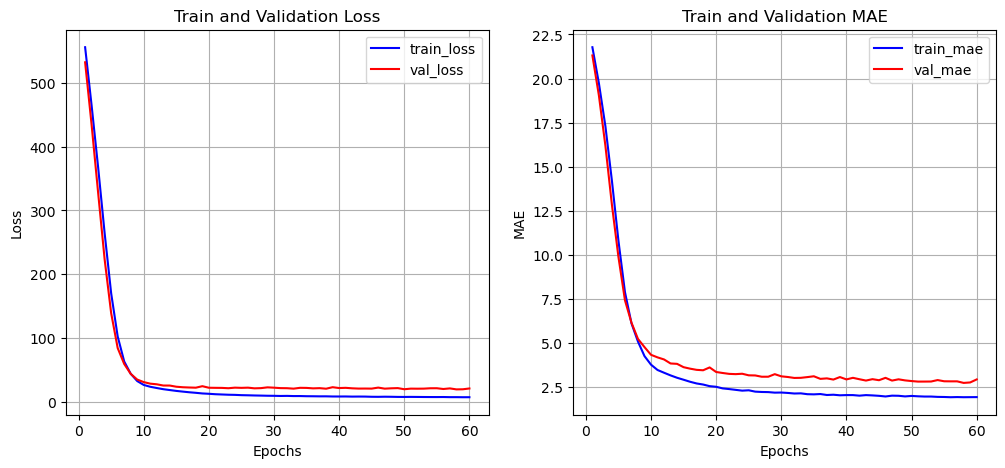

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
#plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

## __1.5 모델 평가 및 예측__

In [8]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 21.1821 - mae: 2.9418


[21.182147979736328, 2.9418113231658936]

- 에폭이 증가함에 따라 train_loss, val_loss, train_mae, val_mae가 감소하고 있다.  
- val loss와 val mae가 크지 않고 train 결과값들과 큰 차이가 없음 = 모델이 과적합되지 않음.
- 그러나 이것은 ___검증 데이터를 분리하지 않고 얻은 결과이므로___, 검증 데이터를 분리해서 다시 학습할 것이다.

In [9]:
# 위에서는 검증 데이터를 따로 분리하지 않았기 때문에, 데이터를 분리해서 학습해보자.

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")

전체 학습 데이터: (404, 13) 레이블: (404,)
학습 데이터: (282, 13) 레이블: (282,)
검증 데이터: (122, 13) 레이블: (122,)


In [10]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
# 회귀모델이므로 활성화 함수는 없다.

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=20,
                    validation_data=(x_val, y_val))


mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

Epoch 1/60
15/15 [==============================] - 0s 8ms/step - loss: 498.4344 - mae: 20.3334 - val_loss: 490.2067 - val_mae: 20.1454
Epoch 2/60
15/15 [==============================] - 0s 2ms/step - loss: 418.3947 - mae: 18.2464 - val_loss: 408.8027 - val_mae: 18.0636
Epoch 3/60
15/15 [==============================] - 0s 3ms/step - loss: 339.2484 - mae: 16.0419 - val_loss: 320.0737 - val_mae: 15.5630
Epoch 4/60
15/15 [==============================] - 0s 3ms/step - loss: 256.5915 - mae: 13.6279 - val_loss: 231.6006 - val_mae: 12.7986
Epoch 5/60
15/15 [==============================] - 0s 3ms/step - loss: 179.6150 - mae: 10.9466 - val_loss: 156.2519 - val_mae: 10.0293
Epoch 6/60
15/15 [==============================] - 0s 3ms/step - loss: 118.4370 - mae: 8.5279 - val_loss: 101.6401 - val_mae: 7.7792
Epoch 7/60
15/15 [==============================] - 0s 2ms/step - loss: 78.0920 - mae: 6.6680 - val_loss: 64.2268 - val_mae: 6.1035
Epoch 8/60
15/15 [==============================] - 0s

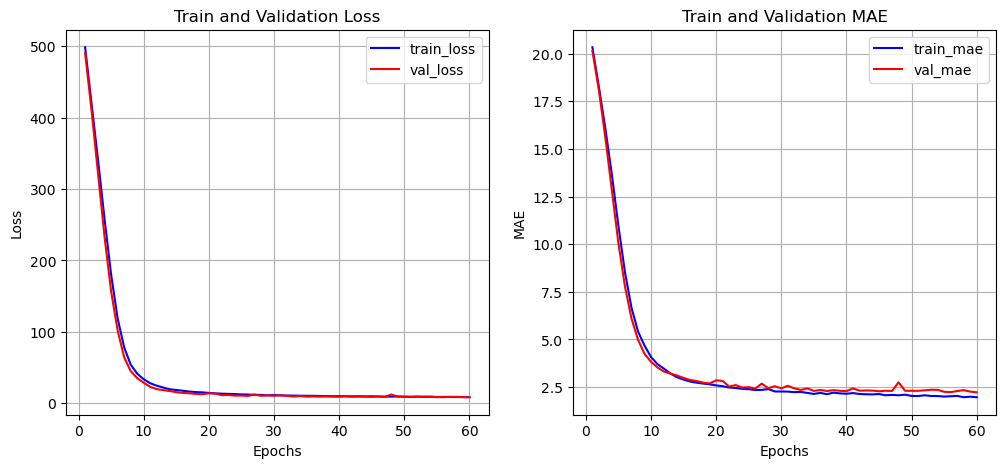

In [12]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
#plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

In [13]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 22.0130 - mae: 2.9099


[22.012996673583984, 2.909877300262451]

데이터 분리 전(loss: 18.9629 - mae: 2.7766)에 비해 성능이 약간 하락했지만, 손실과 MAE가 더 빠르게 안정화되었다.

# __2 Reuters 딥러닝 모델__  

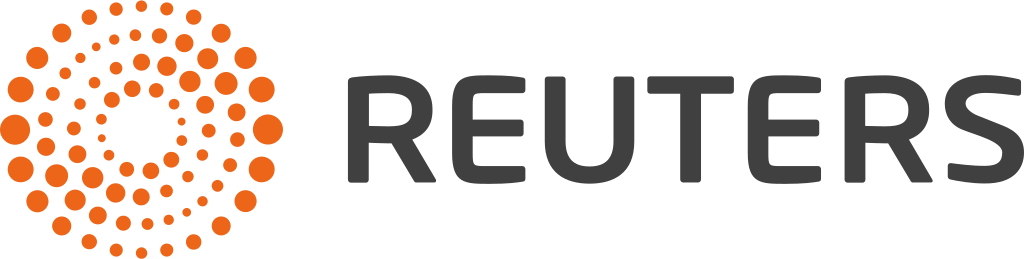
- 로이터 뉴스기사 데이터셋
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
- 뉴스 기자의 주제로 46개 레이블

## __2.1 데이터 로드 및 전처리__  
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.  
    데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라미터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [15]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.25,  # 25%를 검증 데이터로 분리
                                                  random_state=123)

print(f"전체 학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"레이블 종류: {len(set(train_labels))}")

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (6736,) 레이블: (6736,)
검증 데이터: (2246,) 레이블: (2246,)
레이블 종류: 46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [16]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
      results[i, d] = 1.
    return results

# 입력 데이터 원-핫 인코딩
x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터 원-핫 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

## __2.2 모델 구성 및 컴파일__  
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [17]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                     

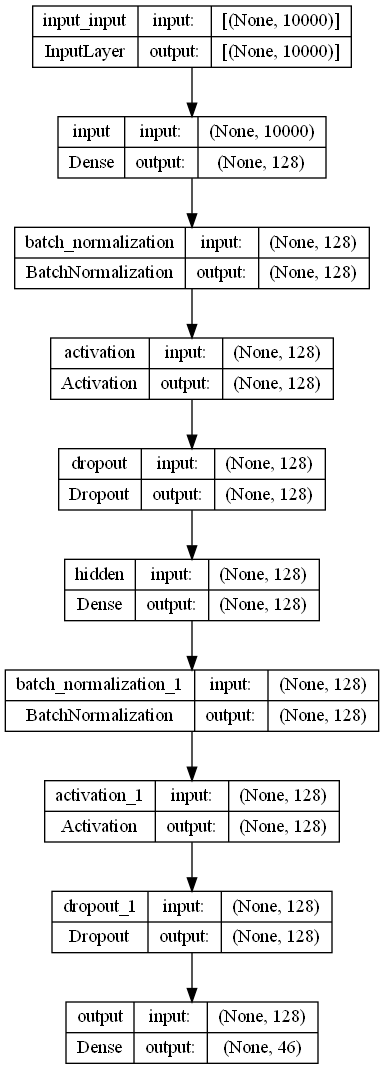

In [18]:
utils.plot_model(model, show_shapes = True)

## __2.3 모델 학습__  

In [19]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
14/14 [==============================] - 1s 39ms/step - loss: 2.1324 - accuracy: 0.5589 - val_loss: 3.3248 - val_accuracy: 0.7012
Epoch 2/40
 7/14 [==============>...............] - ETA: 0s - loss: 1.0469 - accuracy: 0.7972

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 23ms/step - loss: 1.0007 - accuracy: 0.8033 - val_loss: 3.1184 - val_accuracy: 0.7382
Epoch 3/40
14/14 [==============================] - 0s 19ms/step - loss: 0.6705 - accuracy: 0.8648 - val_loss: 2.9064 - val_accuracy: 0.6981
Epoch 4/40
14/14 [==============================] - 0s 19ms/step - loss: 0.4772 - accuracy: 0.9080 - val_loss: 2.6762 - val_accuracy: 0.6238
Epoch 5/40
14/14 [==============================] - 0s 20ms/step - loss: 0.3601 - accuracy: 0.9244 - val_loss: 2.3931 - val_accuracy: 0.5739
Epoch 6/40
14/14 [==============================] - 0s 21ms/step - loss: 0.2779 - accuracy: 0.9433 - val_loss: 2.1333 - val_accuracy: 0.6322
Epoch 7/40
14/14 [==============================] - 0s 20ms/step - loss: 0.2271 - accuracy: 0.9486 - val_loss: 1.9034 - val_accuracy: 0.5557
Epoch 8/40
14/14 [==============================] - 0s 27ms/step - loss: 0.1943 - accuracy: 0.9565 - val_loss: 1.7009 - val_accuracy: 0.6122
Epoch 9/40
14/14 [======

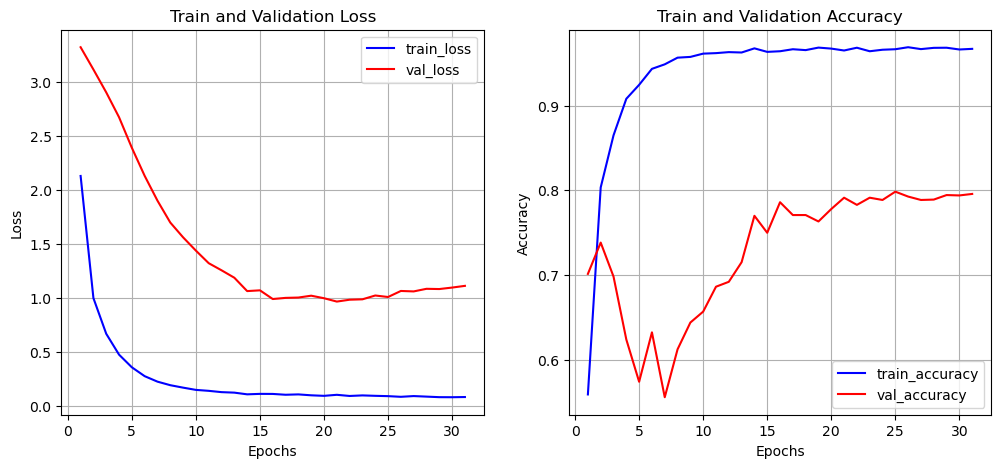

In [20]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## __2.4 모델 평가 및 예측__

In [21]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9580 - accuracy: 0.7956


[0.9579558372497559, 0.7956367135047913]

[loss 그래프]
- train_loss는 지속적으로 감소하는 반면, val_loss는 20 epoch부터 증가 추세
- validation 데이터에서 약간의 과적합

[acc 그래프]
- train data에 대한 accuracy가 거의 0.98에 이름. 훈련 데이터가 잘 학습되고 있음.
- val_acc은 초기에 불안정하다가 상승하여 0.8 부근에서 안정화, 그러나 train acc에 비해 낮은 값에서 안정화됨. 과적합 가능성

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                     

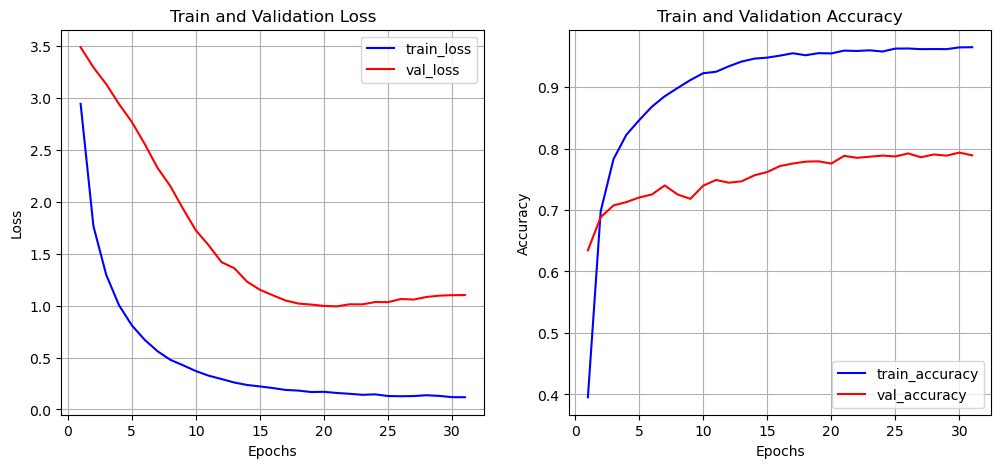

In [22]:
# 모델 복잡성 줄여 테스트
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [23]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9971 - accuracy: 0.7881


[0.9971209764480591, 0.7880676984786987]

accuracy가 약간 하락했지만 (0.7898 -> 0.7841), val_acc의 불안정성이 감소했다.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                     

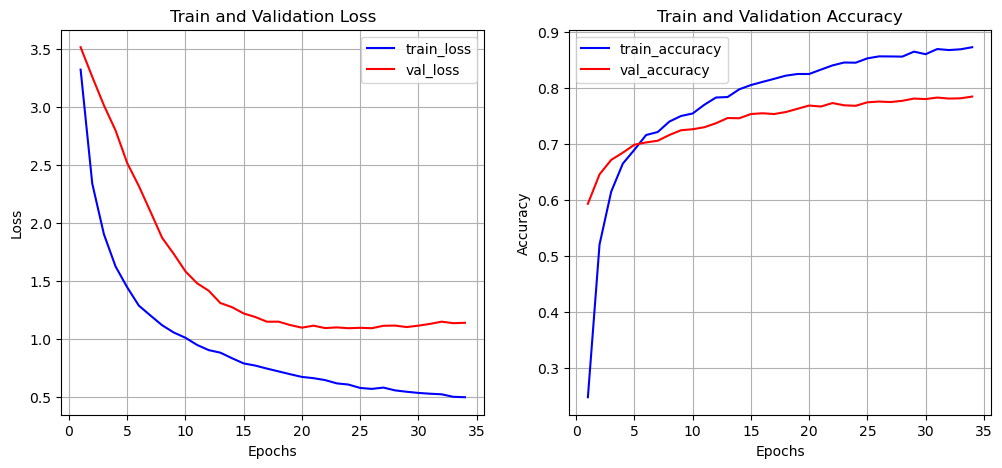

In [24]:
# 모델 복잡성 줄이고+dropout 비율 높여 테스트
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(64, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 1.0629 - accuracy: 0.7738


[1.062916874885559, 0.7738201022148132]

이전에 비해 val_loss와 val_acc의 과적합 현상이 약간 감소함. 그래도 아직 val_loss에서 약간의 과적합이 관찰되므로, 모델을 좀 더 수정해보자.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_6 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_7 (Bat  (None, 64)                256       
 chNormalization)                                     

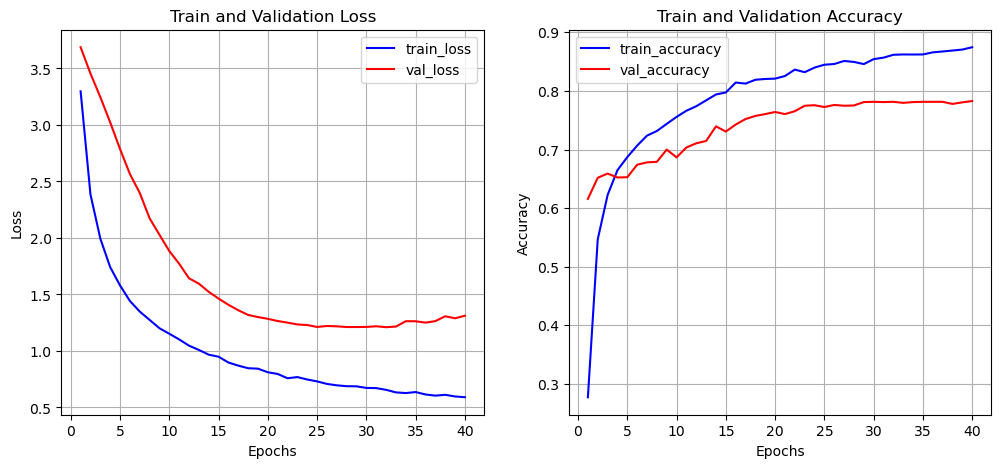

In [26]:
# 모델 복잡성 줄이고+dropout 비율 높이고+L2 규제 추가
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), kernel_regularizer=regularizers.l2(0.001), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [27]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2929 - accuracy: 0.7796


[1.2929128408432007, 0.7796081900596619]

과적합이 약간 줄었다.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_10 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_11 (Ba  (None, 64)                256       
 tchNormalization)                                    

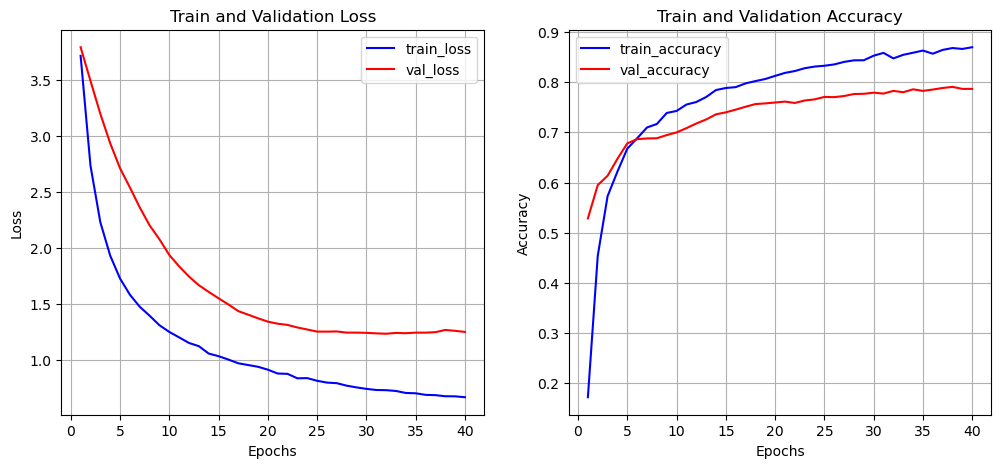

In [29]:
# 모델 복잡성 줄이고+dropout 비율 높이고+L2 규제 추가+옵티마이저 변경, 학습률 조정
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), kernel_regularizer=regularizers.l2(0.001), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(46, activation='softmax', name='output'))

optimizer = optimizers.Adam(lr=0.001)   # optimizer를 adam으로 변경, learning rate 조절

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [30]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2433 - accuracy: 0.7845


[1.2432845830917358, 0.7845057845115662]

optimizer를 adam으로 바꾸고 learning rate를 조절하니 과적합이 거의 관찰되지 않았다.

# __3 CEIFAR10 딥러닝 모델__  
## __3.1 Data__  
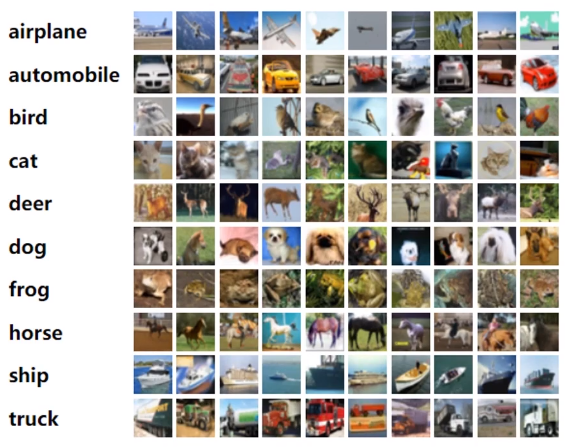
- 32x32 픽셀의 6,000개 컬러이미지 포함
- 각 이미지는 10개 클래스로 라벨링  
- MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 데이터셋

## __3.2 데이터 로드 및 전처리__  
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 ```keras.datasets```에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.  
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 ```train_test_split``` 함수를 활용합니다.  
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
# plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## __3.3 모델 구성 및 컴파일__  
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성
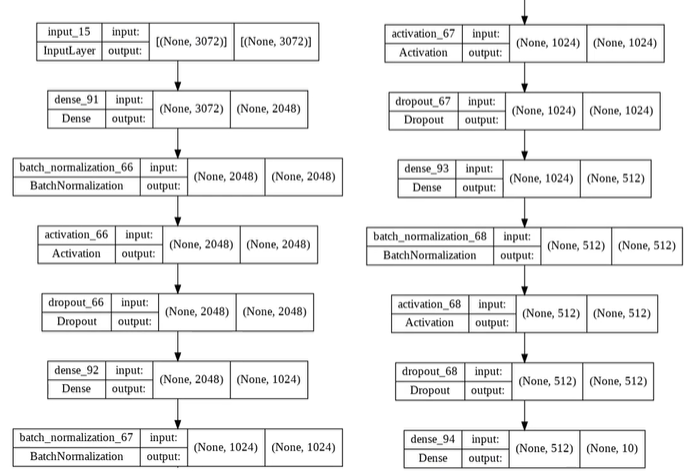

In [ ]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
utils.plot_model(model, show_shapes=True)

## __3.4 모델 학습__  
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

- validation data의 loss와 acc가 불안정하게 나타나고 있음.  
- 학습 데이터에 대해서는 모델 학습이 잘 진행되지만, 검증 데이터에 대해서는 그렇지 못하여 과적합이 발생하고 있거나  
    learning rate가 높아서 최적의 loss point를 지나쳤을 수 있음


In [ ]:
from tensorflow.keras import models, layers, callbacks, optimizers

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.6))  # Dropout 비율을 0.6으로 증가
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.6))  # Dropout 비율을 0.6으로 증가
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.6))  # Dropout 비율을 0.6으로 증가
model.add(layers.Dense(10, activation='softmax'))

# 학습률을 낮추는 RMSprop 옵티마이저를 사용합니다.
rmsprop = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=20,  # patience를 20으로 증가
                                            monitor='val_loss',
                                            restore_best_weights=True)

# 학습을 시작합니다.
history = model.fit(x_train, y_train, epochs=100,  # 에포크 수를 100으로 증가
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()